# 4/13  3. Знакомимся с новыми данными: коронавирус

In [53]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

`covid_data` — данные о показателях заболеваемости за каждый день в различных регионах 187 стран. 

In [54]:
covid_data = pd.read_csv('data/covid_data.csv').copy()
display(covid_data.head())


,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


Мы будем работать со следующими столбцами:

`date` — дата наблюдения;  
`province`/`state` — наименование провинции/штата;  
`country` — наименование страны;  
`confirmed` — общее число зафиксированных случаев на указанный день;  
`deaths` — общее число зафиксированных смертей на указанный день;  
`recovered` — общее число выздоровлений на указанный день.  

`country_vaccinations` — данные о процессе вакцинирования людей в 221 стране мира.

In [55]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv').copy()
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


Данная таблица содержит следующие столбцы:

`country` — наименование страны;  
`date` — дата наблюдения;  
`total_vaccinations` — общее число введённых вакцин в стране на указанный день;  
`people_vaccinated` — общее число привитых первым компонентом в стране на указанный день;  
`people_vaccinated_per_hundred` — процент привитых первым компонентом в стране на указанный день (рассчитывается как `people_vaccinated`/`population`*100);  
`people_fully_vaccinated` — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);  
`people_fully_vaccinated_per_hundred` — процент привитых вторым компонентом в стране на указанный день (рассчитывается как `people_fully_vaccinated`/`population`*100);  
`daily_vaccination` — ежедневная вакцинация (число вакцинированных в указанный день);  
`vaccines` — комбинации вакцин, используемые в стране.

ПРЕДОБРАБОТКА ДАННЫХ

В таблице covid_data:

1
Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [56]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0
...,...,...,...,...,...
86780,12/31/2020,Vietnam,1465.0,35.0,1325.0
86781,12/31/2020,West Bank and Gaza,138004.0,1400.0,117183.0
86782,12/31/2020,Yemen,2099.0,610.0,1394.0
86783,12/31/2020,Zambia,20725.0,388.0,18660.0


2
Преобразуем даты в формат `datetime` с помощью функции `pd.to_datetime`():

In [57]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       86785 non-null  datetime64[ns]
 1   country    86785 non-null  object        
 2   confirmed  86785 non-null  float64       
 3   deaths     86785 non-null  float64       
 4   recovered  86785 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 3.3+ MB


3
Создадим признак больных на данный момент (`active`). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [58]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data

,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0
...,...,...,...,...,...,...
86780,2020-12-31,Vietnam,1465.0,35.0,1325.0,105.0
86781,2020-12-31,West Bank and Gaza,138004.0,1400.0,117183.0,19421.0
86782,2020-12-31,Yemen,2099.0,610.0,1394.0,95.0
86783,2020-12-31,Zambia,20725.0,388.0,18660.0,1677.0


4
Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода `diff()`:

In [59]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
covid_data.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


В таблице vaccinations_data достаточно будет преобразовать столбцы в формат `datetime`:



In [60]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
vaccinations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              42795 non-null  object        
 1   date                                 42795 non-null  datetime64[ns]
 2   total_vaccinations                   23457 non-null  float64       
 3   people_vaccinated                    22371 non-null  float64       
 4   people_vaccinated_per_hundred        22371 non-null  float64       
 5   people_fully_vaccinated              19462 non-null  float64       
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64       
 7   daily_vaccinations                   42558 non-null  float64       
 8   vaccines                             42795 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.9+ MB


Задание 3.1

За какой период представлены данные в таблице `covid_data`? В качестве ответа введите даты в формате `datetime` (без указания времени).
Введите ответ в следующем формате (без пробелов): `ГГГГ-ММ-ДД-ГГГГ-ММ-ДД`

In [61]:
covid_data['date'].describe()

count                            86785
mean     2020-10-15 20:19:34.931151616
min                2020-01-22 00:00:00
25%                2020-06-25 00:00:00
50%                2020-10-17 00:00:00
75%                2021-02-07 00:00:00
max                2021-05-29 00:00:00
Name: date, dtype: object

Задание 3.2

За какой период представлены данные в таблице `vaccinations_data`? В качестве ответа введите даты в формате `datetime` без указания времени.
Введите ответ в следующем формате (без пробелов): `ГГГГ-ММ-ДД-ГГГГ-ММ-ДД`

In [62]:
vaccinations_data['date'].describe()

count                            42795
mean     2021-05-21 12:12:46.182965248
min                2020-12-02 00:00:00
25%                2021-04-02 00:00:00
50%                2021-05-26 00:00:00
75%                2021-07-15 00:00:00
max                2021-09-06 00:00:00
Name: date, dtype: object

Задание 3.3

С помощью метода `merge()` объедините таблицы `covid_data` и `vaccinations_data` по столбцам `date` и `country`.
Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы `covid_data` и из её пересечения с `vaccinations_data`, но не более. Результат объединения занесите в переменную `covid_df`.

Сколько строк и столбцов в таблице `covid_df`?  
Введите ответ в виде двух чисел через дефис (например, 333-33): первое число — количество строк, второе число — количество столбцов.

In [63]:
covid_df = covid_data.merge(vaccinations_data,
                 how='left',
                 on=['date', 'country']                 
                 )
covid_df

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В получившейся в задании 3.3 таблице `covid_df` создайте признаки `death_rate` — общий процент смертей среди зафиксированных случаев (летальность) и `recover_rate` — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (`deaths`) и числа выздоровлений (`recovered`) к числу зафиксированных случаев (`confirmed`) и умножьте результаты на `100%`.

In [64]:
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100
covid_df

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Задание 3.4

Какова максимальная летальность в США (`United States`) за весь период? Ответ округлите до второго знака после запятой.

In [65]:
round(covid_df.groupby('country')['death_rate'].max()['United States'], 2)

# Решение SkillFactory:
# round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

Задание 3.5

Чему равен средний процент выздоровевших в России (`Russia`)? Ответ округлите до второго знака после запятой.

In [66]:
round(covid_df.groupby('country')['recover_rate'].mean()['Russia'], 2)


67.06

# 5/13  4. Графические возможности библиотеки `Pandas`

БАЗОВАЯ ВИЗУАЛИЗАЦИЯ В PANDAS

Основным методом для создания простейших графиков в Pandas является `plot()`.

Основные параметры метода `plot()`

`x` — название признака, который будет отложен по оси абсцисс;  
`y` — название признака, который будет отложен по оси ординат;  
`figsize` — размер графика (кортеж из ширины и высоты в дюймах);  
`kind` —тип визуализации. Основные типы:  
- '`line`' — линейный график (по умолчанию);  
- '`bar`' — столбчатая диаграмма;  
- '`barh`' — горизонтальная столбчатая диаграмма;  
- '`hist`' — гистограмма;  
- '`box`' — коробчатая диаграмма (`boxplot`);  
- '`pie`' — круговая диаграмма;  
- '`scatter`' — диаграмма рассеяния.  

`grid` — отображение сетки (по умолчанию False);  
`legend` — отображение легенды (по умолчанию False);  
`title` — название графика;  
`color` — цвет.

Давайте попрактикуемся в использовании метода `plot()`.

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (`daily_confirmed`) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода `plot()`. Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр `lw` (`line width`) отвечает за ширину линии для линейного графика.

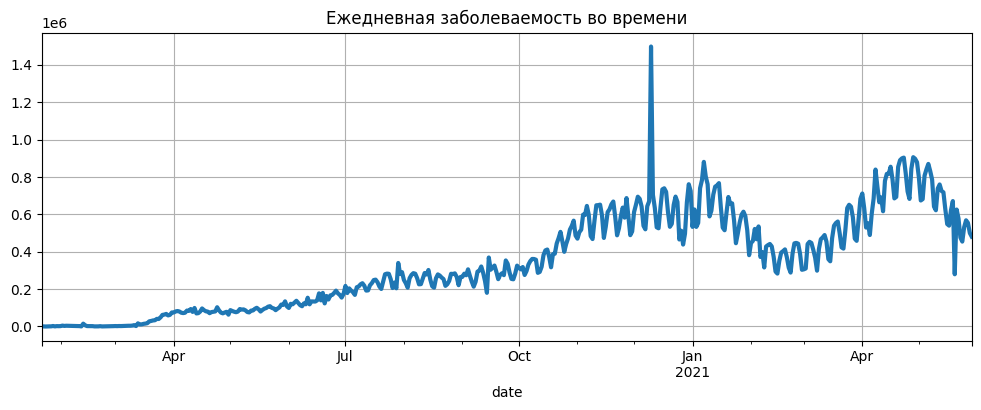

In [67]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line', # Вид графика
    figsize=(12, 4), # Размер графика
    title='Ежедневная заболеваемость во времени',
    grid = True, # Отображение сетки
    lw=3 # Ширина линии
);

Примечание. Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная `grouped_cases` — это объект `Series`.

`plot()` может являться методом объекта типа `DataFrame` или `Series`. При типе `DataFrame` требуется указать `х` и `у`, либо будут построены графики всех столбцов. При типе `Series` в этом нет необходимости, ведь это и так всего один столбец данных (`у`) с индексами (`х`).

При этом по оси абсцисс (`х`) откладываются индексы (на сгруппированных данных `grouped_cases` индексы — это даты), а по оси ординат (`у`) — значения показателей.

Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать и посмотрите, что будет).

Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение '`hist`'. Параметр `bins` (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

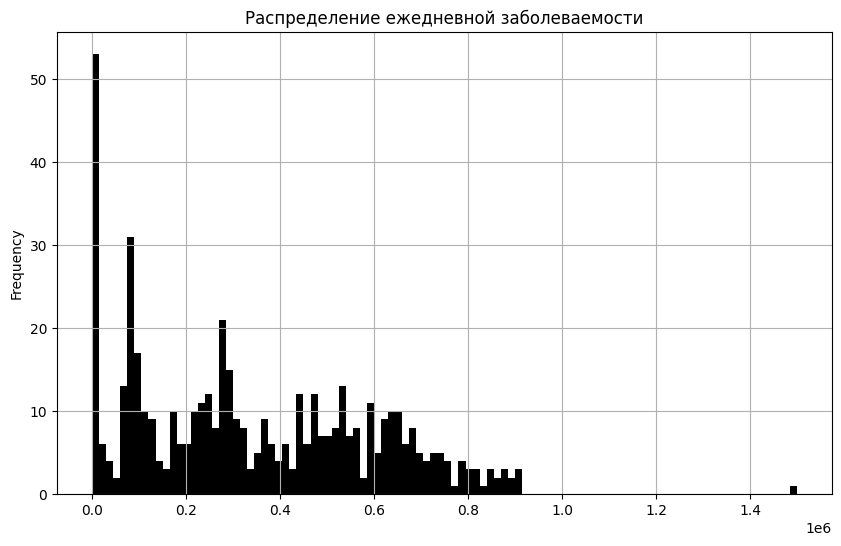

In [68]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6), # Размер графика
    title='Распределение ежедневной заболеваемости',
    grid = True, # Отображение сетки
    color = 'black',
    bins=100 # Колличество пряугольников
);


Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода `last()` — он возвращает последнее значение в столбце `DataFrame`.

Для построения столбчатой диаграммы значение параметра kind выставляем на '`bar`'. Параметр `colormap` отвечает за цветовую гамму графика.

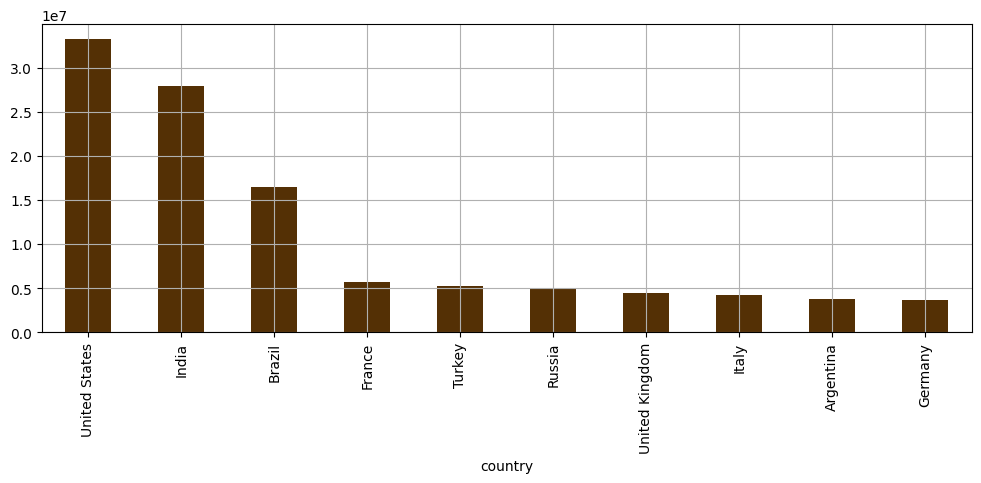

In [74]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True, # Отображение сетки
    figsize=(12, 4), # Размер графика
    colormap='BrBG' # Цветовая гамма
);

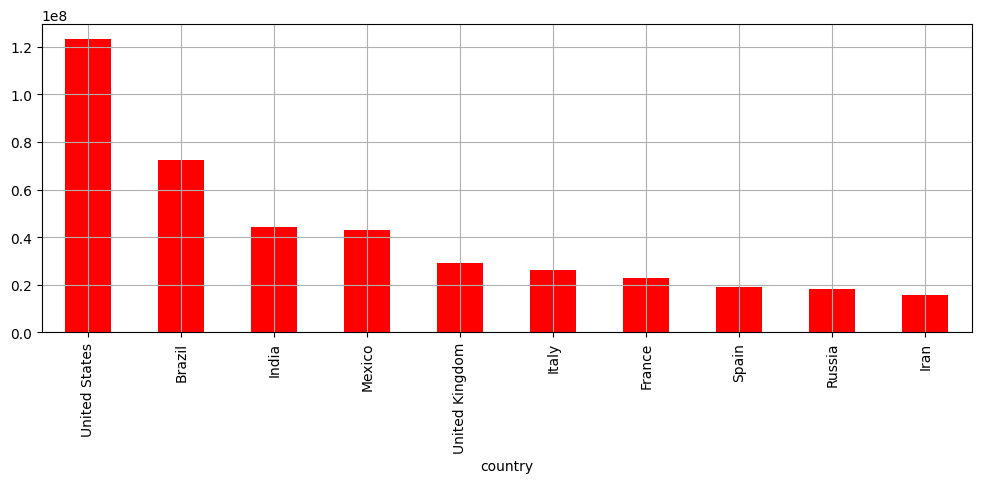

In [ ]:
grouped_country = covid_df.groupby(['country'])['deaths'].sum()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True, # Отображение сетки
    figsize=(12, 4), # Размер графика
    colormap='flag' # Цветовая гамма
);

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

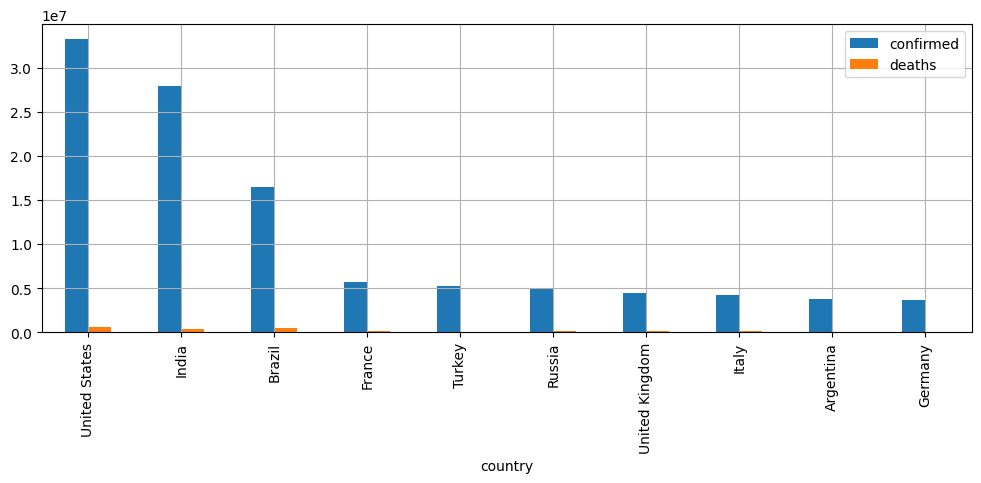

In [70]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

Задание 4.3

С помощью какого из перечисленных ниже вариантов кода можно получить такой график?

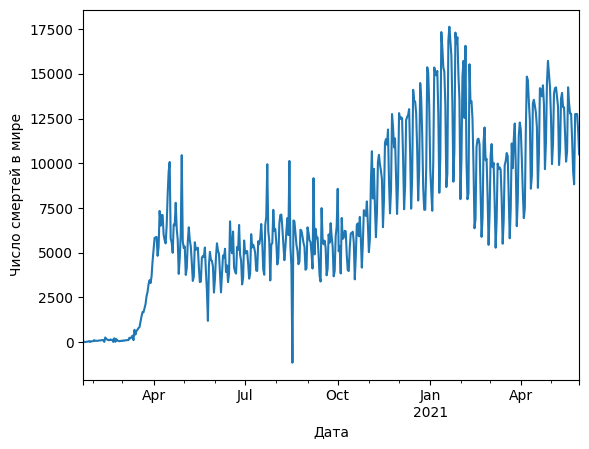

In [75]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

Задание 4.4

С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (`total_vaccinations`)?

*В данном задании мы используем метод `nsmallest()`, который позволяет выбрать `n` наименьших значений в `Series`, а также метод `last()`, с помощью которого можно получить первое непустое значение в группах.*

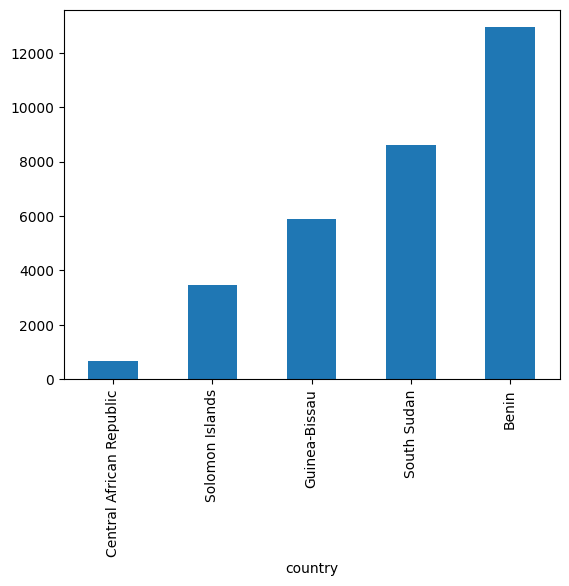

In [76]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

# 6/13  5. Графические возможности библиотеки `Matplotlib`

НЕМНОГО О БИБЛИОТЕКЕ

→ На самом деле мы с вами уже использовали `Matplotlib` — встроенная визуализация в Pandas полностью основана на данной библиотеке. Однако визуализация в Matplotlib не ограничивается только DataFrame: c помощью Matplotlib можно визуализировать любые последовательности (`списки`, `словари`, `NumPy-массивы`).

→ К тому же инструментарий библиотеки поможет вам расширить ваши возможности визуализации, управляя параметрами настройки графиков вручную.

За визуализацию графиков в `Matplotlib` отвечает модуль `pyplot`. Традиционно он импортируется под псевдонимом `plt`. Для более корректного отображения графиков в ноутбуках используется команда `%matplotlib inline`.

*Примечание. Если вы используете тёмную тему в `VS Code`, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:*

`plt.style.use('default')`

ОСНОВНЫЕ ОБЪЕКТЫ `MATPLOTLIB`

Библиотека `Matplotlib` позволяет работать в нескольких режимах. Самый распространённый и мощный по функционалу — `объектно-ориентированный режим`. Он основан на работе с объектами фигур (`figure`, их ещё называют канвасами или холстами) и координатных плоскостей (`axes`, или системы координат). 

На рисунке ниже представлена визуализация основных компонентов графика в `Matplotlib`:
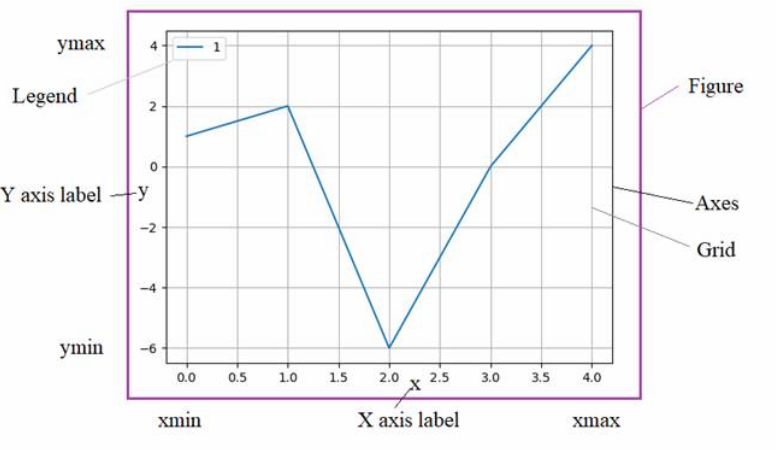

Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (`fig`) , содержащий необходимую информацию и настройки, например размер в дюймах (`figsize`, восемь дюймов в ширину, четыре — в высоту). К этому объекту с помощью метода `add_axes`() добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

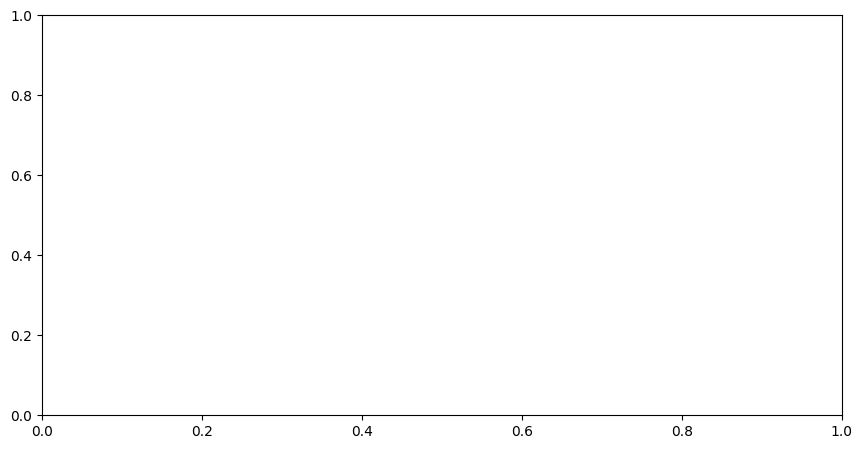

In [78]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

Теперь на созданной системе координат мы можем построить график. 

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (`daily_confirmed`) от общего количества привитых вторым компонентом вакцины (`people_fully_vaccinated`) в США.



У объекта координатной плоскости `axes` вызовем метод `scatter()`.

Основные параметры метода `scatter()`

`x`, `y` — последовательности, которые будут отложены по осям абсцисс и ординат;  
`s` — размер маркеров;  
`marker` — вид маркеров ('`o`' — точки, '`^`' — треугольники);  
`c` — цвет маркеров.

На **диаграмме рассеяния** по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:

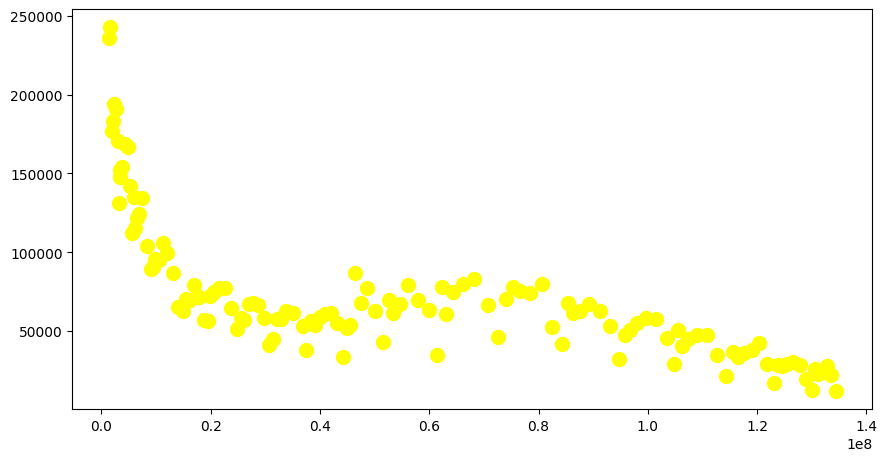

In [88]:
us_data = covid_df[covid_df['country'] == 'United States'] # Было: covid_data. ??

# %matplotlib inline # Разницы не увидел...
# plt.style.use('default')
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'yellow'
);

Из диаграммы видно, что, в основном, с ростом числа привитых вторым компонентом людей заболеваемость падает, замедляясь на уровне около 50 тысяч заболевших в день, и продолжает снижение дальше.

Построим **круговую диаграмму**, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

Для построения круговых диаграмм в ё используется метод `pie()`.

Основные параметры метода `pie()`

`x` — значения, по которым будет строиться круговая диаграмма;  
`labels` — метки, соответствующие значениям;  
`autopct` — формат отображения долей на диаграмме (например, '`%.1f%%`' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "`%`";  
открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "`%`");  
`explode` — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.

ТОП-10 комбинаций вакцин (`vaccines`) по распространённости мы находим с помощью метода `value_counts()`. Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

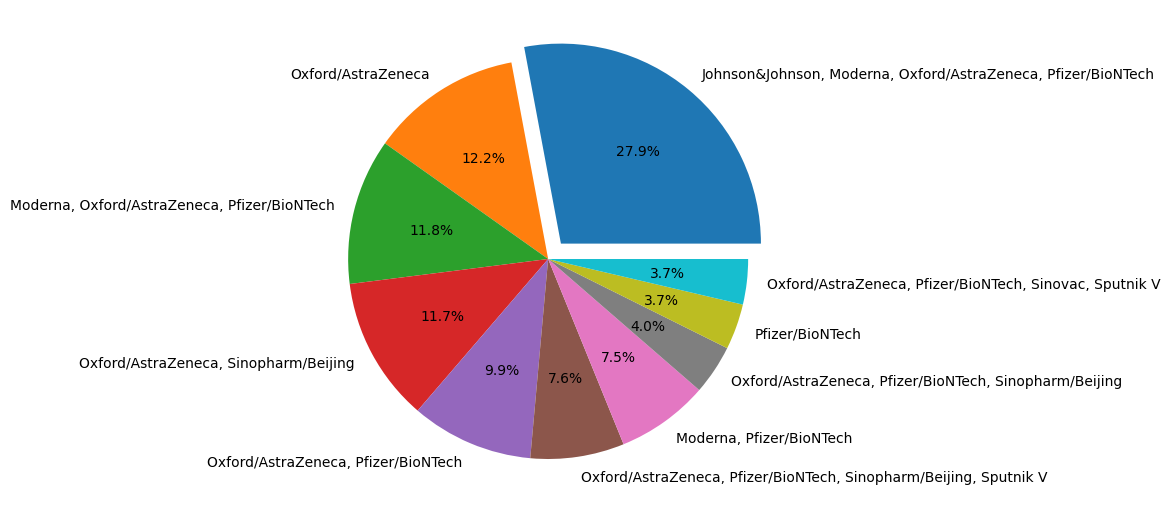

In [98]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

Самой распространённой комбинацией вакцин является комбинация: Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. Причём можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.

→ Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности и посчитать, в скольких странах она используется.

1  
Для начала нам необходимо избавиться от пропусков в столбце с вакцинами. Сделаем это с помощью метода `dropna()`, который удаляет строки, содержащие пропуски в столбце, указанном в параметре `subset()`:

In [99]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])

2  
Полученные данные необходимо сгруппировать по странам (`country`) и определить последнюю зафиксированную комбинации вакцин в столбце `vaccines`:

In [100]:
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()

В результате такого преобразования мы получаем Series, значениями которого являются комбинации вакцин, которые использовались в странах в последний день рассматриваемого периода.

In [101]:
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

3  
Преобразуем данные с помощью метода `apply()`: применим к столбцу `lambda-функцию`, в которой будем удалять из строки с комбинациями вакцин пробелы и разделять комбинацию на отдельные составляющие по запятым.

In [ ]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

В результате в каждой строке столбца получим список с отдельными вакцинами, которые используются в стране:

In [104]:
combination_last

country
Afghanistan    [Johnson&Johnson, Oxford/AstraZeneca, Pfizer/B...
Albania        [Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac,...
Algeria        [Oxford/AstraZeneca, Sinopharm/Beijing, SputnikV]
Andorra                    [Oxford/AstraZeneca, Pfizer/BioNTech]
Angola                                      [Oxford/AstraZeneca]
                                     ...                        
Venezuela         [Sinopharm/Beijing, Sinopharm/Wuhan, SputnikV]
Vietnam        [Moderna, Oxford/AstraZeneca, Pfizer/BioNTech,...
Yemen                                       [Oxford/AstraZeneca]
Zambia                   [Oxford/AstraZeneca, Sinopharm/Beijing]
Zimbabwe       [Oxford/AstraZeneca, Sinopharm/Beijing, Sinova...
Name: vaccines, Length: 174, dtype: object

4  
Создадим словарь v`accines_dict={}`, ключами которого будут являться уникальные вакцины, а значениями — количество стран, в которых они используются. Изначально словарь пустой.

5  
Заполнение словаря реализуем «в лоб» — используя циклы. Во внешнем цикле будем проходиться по всем элементам `Series` `combination_last`. На каждой итерации цикла в переменной цикла `vaccines_list` будет находиться список вакцин, которые используются в стране.

Во внутреннем цикле будем проходиться по элементам этого списка, вакцинам. Переменную внутреннего цикла назовём vaccine.

В теле внутреннего цикла проверяем условие, что текущей вакцины ещё нет среди ключей словаря `vaccones_dict`. Если это условие выполняется, добавляем вакцину в словарь со значением 1. В противном случае увеличиваем текущее количество стран, в которых используется данная вакцина:

In [105]:
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

6  
В результате работы получаем словарь, который преобразуем в объект `Series`. Далее выделим семь наиболее популярных вакцин, а остальные обозначим как '`other`'. Для этого сортируем `Series` по убыванию. Вычислим суммарное количество стран, в которых используются вакцины, не попавшие в наш ТОП-7, результат запишем в `Series` по индексу '`other`'.

Далее выделим восемь наибольших значений в полученной Series — для них и будем строить круговую диаграмму.



In [106]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]


7  
Строим круговую диаграмму:

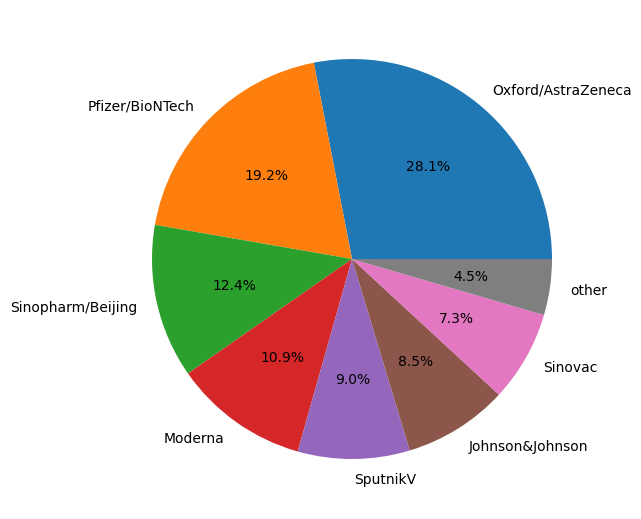

In [107]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

Полный код:

In [ ]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_data.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ

Управлять информативностью графика можно с помощью методов координатной плоскости `axes`. 

`axes.set_title()` — заголовок диаграммы, а также его настройки (например, параметр `fontsize` отвечает за размер шрифта);  
`axes.set_xlabel()` — название оси абсцисс;  
`axes.set_ylabel()` — название оси ординат;  
`axes.set_xticks()` — установка отметок на оси абсцисс;  
`axes.set_yticks()` — установка отметок на оси ординат;  
`axes.xaxis.set_tick_params()` — управление параметрами отметок на оси абсцисс (например, параметр `rotation` отвечает за поворот отметок в градусах);  
`axes.yaxis.set_tick_params()` — управление параметрами отметок на оси ординат;  
`axes.legend()` — отображение легенды;  
`axes.grid()` — установка сетки.

Например, изобразим на одном графике, как росла общая заболеваемость (`confirmed`), число зафиксированных смертей (`deaths`), выздоровевших пациентов (`recovered`) и активных случаев (`active`) в Китае.

Для построения линейных графиков в `Matplotlib` используется метод `plot()` (*не путайте с методом plot() в Pandas!*). При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты). 

Дополнительно в параметрах метода указываем параметр `label` — название графика, которое будет отображаться на легенде, а также `lw` — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси `y` с частотой в `10 000`, повернём метки по оси `x` на `30 градусов`, а также добавим легенду (метки для легенды выставляются в параметре `label` метода `plot()`):

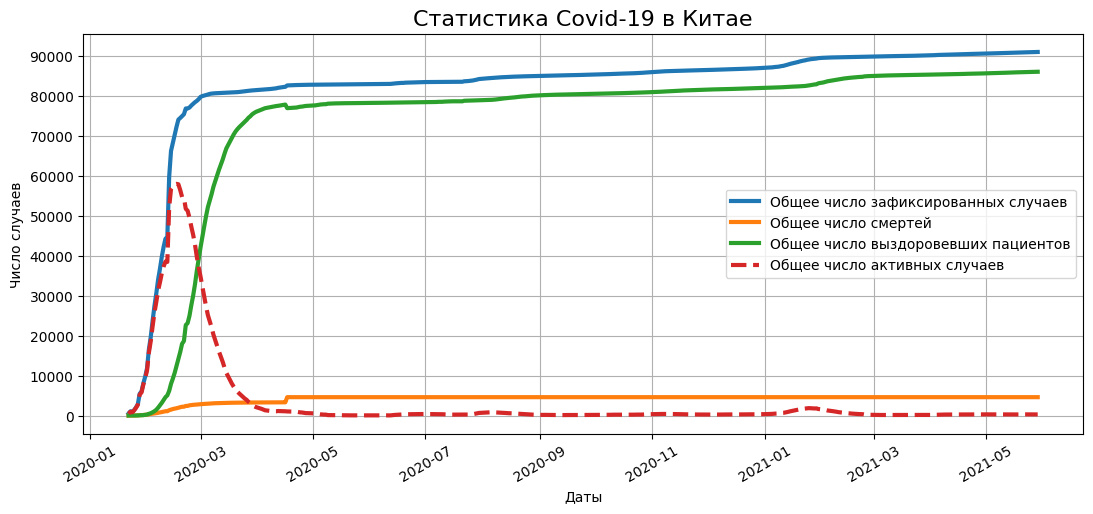

In [116]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

Стоит обратить внимание на (2020-05) сдвиги в графиках. Они являются свидетельством противоречия в данных: общее число выздоровевших пациентов почему-то резко упало, а число умерших возросло. Почему так произошло? Произошёл пересчёт числа заболевших? Данные были утеряны или искажены? Если вы в своей практике столкнётесь с такими же противоречиями, вам необходимо будет обратиться к первоисточнику, чтобы выяснить причину.

ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ

→ Вы можете размещать несколько систем координат на одной фигуре, что позволит нам отображать вспомогательную информацию на основном графике.

Для добавления второй системы координат необходимо повторно применить к объекту `fig` метод `add_axes`, указав новое имя для второй системы координат.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (`people_fully_vaccinated`), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (`people_fully_vaccinated_per_hundred`).

Для этого построим столбчатые диаграммы с помощью метода `bar()`.

Основные параметры метода `bar()`

`x` — названия категорий, которые будут располагаться по оси абсцисс;  
`height` — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);  
`width` — ширина столбцов диаграммы;  
`color` — цвет.

Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода `last()` и выбираем ТОП-5 стран с использованием метода `nlargest()`.

При отображении графиков создаём две координатные плоскости `main_axes` и `insert_axes`, на каждой из них отдельно строим столбчатые диаграммы.

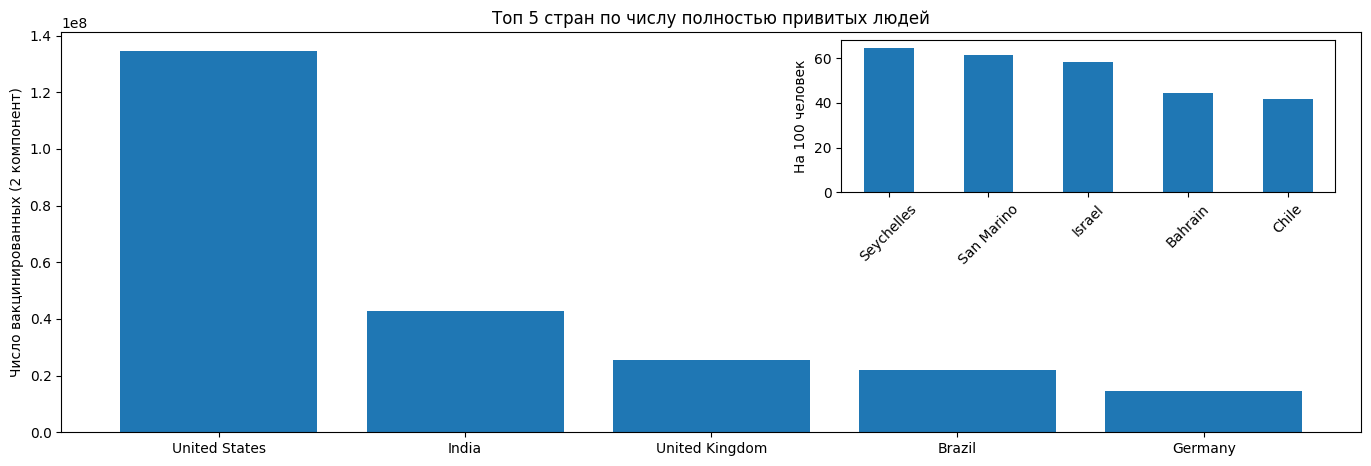

In [117]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

`SUBPLOTS`

В большинстве случаев для отображения нескольких систем координат используется функция `subplots()`. Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.

Основные параметры метода `subplots()`

`nrows` — число строк;  
`ncols` — число столбцов;  
`figsize` — общий размер фигуры в дюймах (ширина и высота).

Например, следующий код создаст шесть координатных плоскостей, сведённых в таблицу размера 2x3:



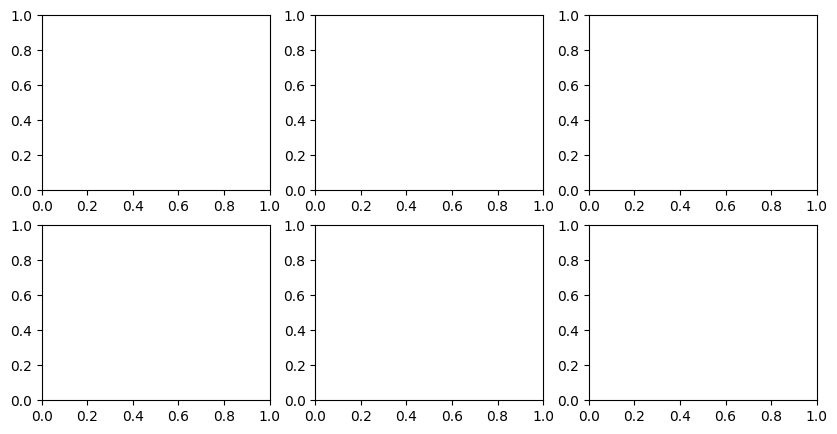

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))


Теперь, обладая знаниями о методе `subplots()`, построим три графика:

Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.  
Линейный график изменения ежедневной заболеваемости в стране.  
Гистограмму ежедневной заболеваемости в стране.  
За построение гистограмм в библиотеке `Matplotlib` отвечает метод `hist()`.

Основные параметры метода `hist()`

`x` — массив чисел, для которого строится гистограмма;  
`bins` — число столбцов (корзин);  
`orientation` — ориентация гистограммы (по умолчанию '`vertical`');  
`color` — цвет.

Фильтруем таблицу `covid_df` по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2). Дальнейшая настройка графиков вам уже известна.

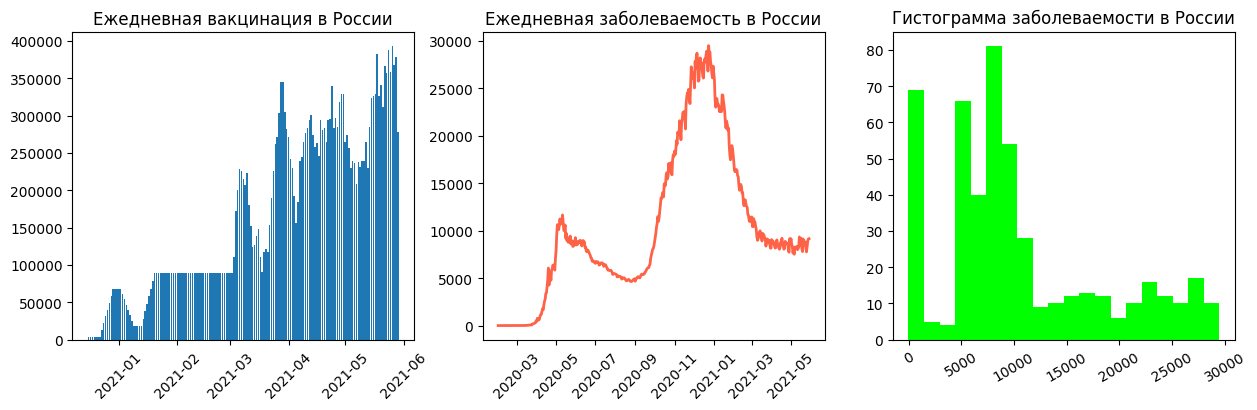

In [119]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

На первом графике можно наблюдать колеблющийся рост числа ежедневно вакцинированных людей. Особенно в глаза бросается «пенёк» в период с конца января до начала марта 2021 года. Это период, когда данные о процессе вакцинации людей не обновлялись.

На втором графике мы видим две волны коронавируса в России. Первая — в середине марта 2020 года, которая достигла максимума в 13 тысяч заболевших за сутки. Вторая волна, судя по графику, началась в октябре 2020 года и достигла своего пика почти в 30 тысяч заболевших за сутки в конце декабря этого же года (точные данные: 24 декабря было зафиксировано рекордное число подтверждённых случаев: 29935).

Далее с ростом показателей вакцинации и введением новых карантинных мер заболеваемость снова постепенно снижается.

На третьем графике можно увидеть, что большая часть наблюдений ежедневной заболеваемости находится в интервале от 5 до до 10 тысяч человек в день. Ещё один пик гистограммы находится около 0 — это случаи, зафиксированные на начальных этапах эпидемии (в Россию Covid-19 пришёл позже, чем во многие другие страны).

Также стоит отметить, что, помимо объектно-ориентированного подхода в работе с библиотекой `Matplotlib`, вы можете встретить и `модульный подход`.

Модульный подход основан на обращении к модулю `pyplot` (`plt`) напрямую, а не средствами объектов фигур и плоскостей. Например, следующий код строит столбчатую диаграмму: по оси `x` откладываются элементы списка names (названия групп), а высоту столбцов определяет список `values`.

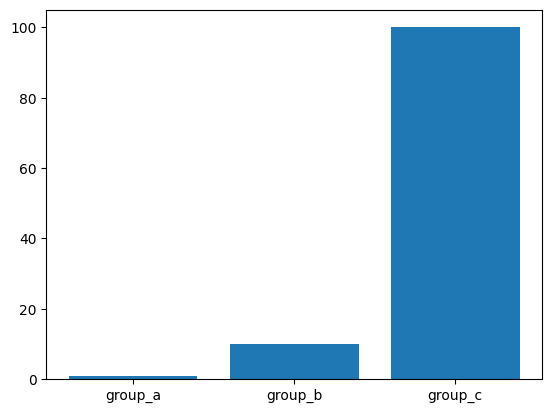

In [120]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

Задание 5.5

Дан код для отрисовки основной системы координат:

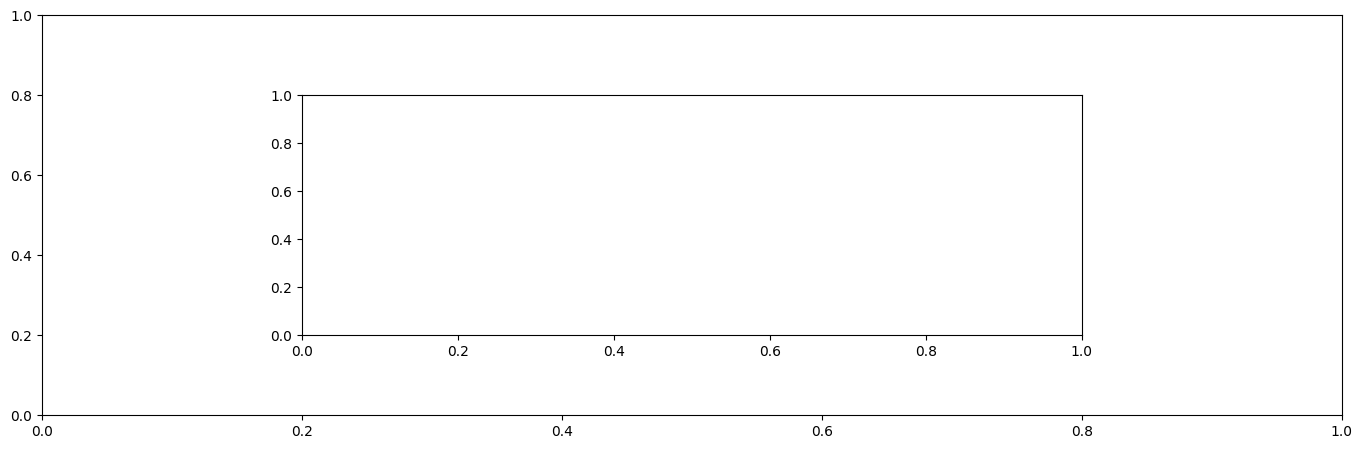

In [121]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])

Задание 5.6

Выберите вариант кода, который позволит построить приведённый ниже график (посмотрите в документации параметры объекта `figure`, которые позволяют раскрашивать части фигуры).
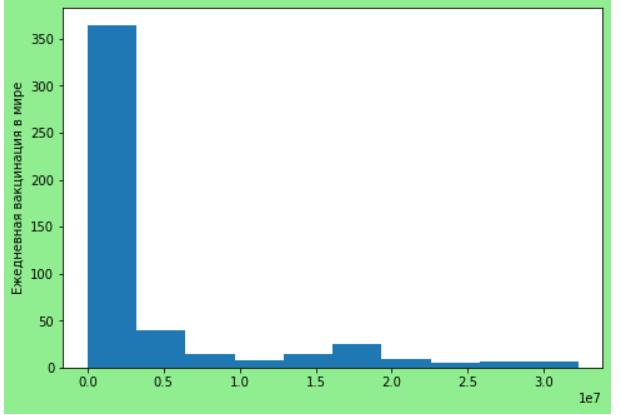

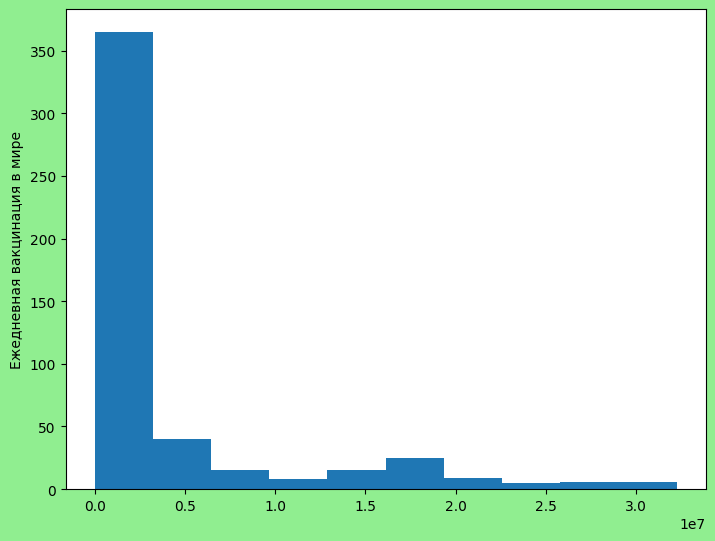

In [126]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');